# matplotlib可视化练习

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
mpl.rc('figure',figsize=(12,9))
mpl.rc('font',size=15)
mpl.rc('axes.spines',top=False, right=False)

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [4]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 小费和总消费之间的关系（散点图）

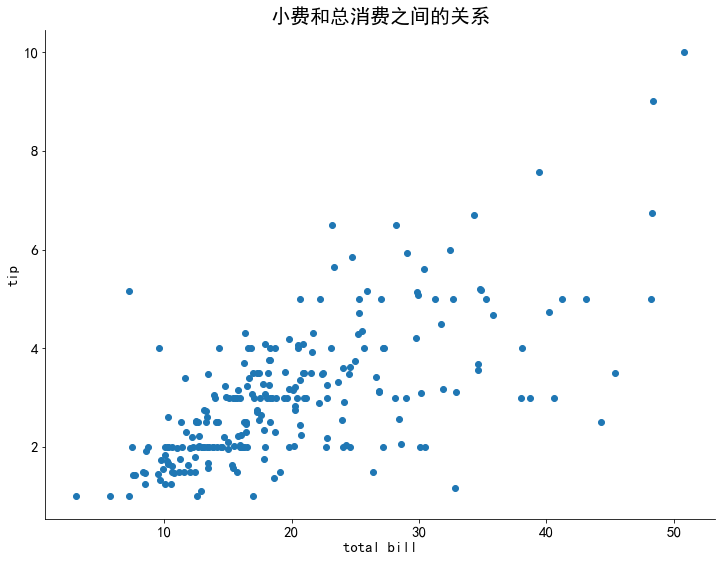

In [5]:
_,axe = plt.subplots()
plt.scatter(data['total_bill'],data['tip'])
plt.xlabel('total bill',fontsize=15)
plt.ylabel('tip',fontsize=15)
plt.title(u'小费和总消费之间的关系',fontsize=20)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

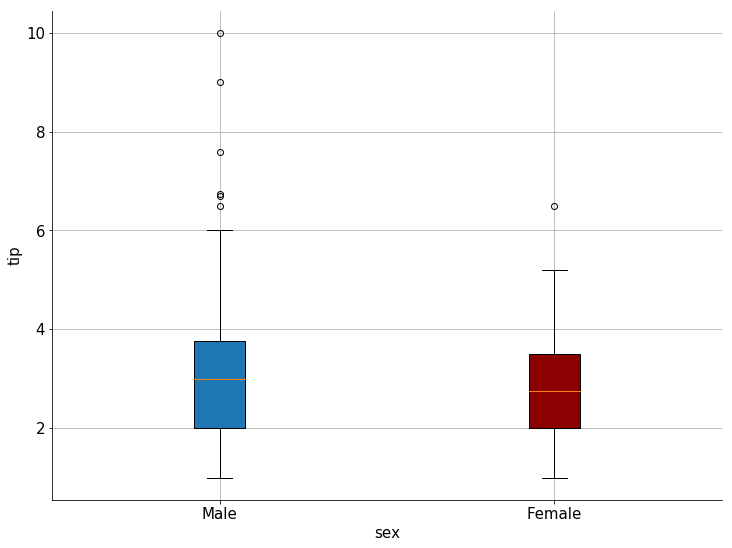

In [83]:
_,axe = plt.subplots()
sex = data['sex'].value_counts().index
sex_distr=[data[data['sex']==s]['tip'] for s in sex]
bplot = axe.boxplot(sex_distr,patch_artist=True)
bplot['boxes'][1].set_facecolor('darkred')
# plt.setp(axe, xticks=[1,2], xticklabels=sex)
plt.xticks([1,2],sex)
plt.xlabel('sex')
plt.ylabel('tip')
plt.grid()

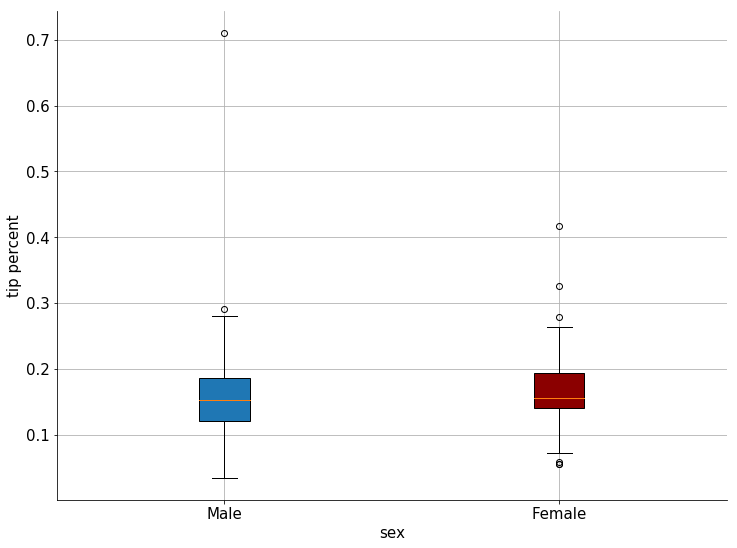

In [84]:
_,axe=plt.subplots()
sex = data['sex'].value_counts().index
data['tip_percent'] = data['tip']/data['total_bill']
sex_tip_prcnt=[data[data['sex']==s]['tip_percent'] for s in sex]
bplot=axe.boxplot(sex_tip_prcnt, patch_artist=True)
plt.setp(axe,xticks=[1,2],xticklabels=sex)
bplot['boxes'][1].set_facecolor('darkred')
axe.set_xlabel('sex')
axe.set_ylabel('tip percent')
plt.grid()

* 抽烟与否是否会对小费金额产生影响（分类箱式图）

In [85]:
def multi_vio(data, distr_col, clsf_col):
    _,axe=plt.subplots()
    clsf = data[clsf_col].value_counts().index
    n = len(clsf)
    alldata=[data[data[clsf_col]==c][distr_col] for c in clsf]
    bplot=axe.violinplot(alldata)
    plt.setp(axe,xticks=[x+1 for x in range(n)],xticklabels=clsf)
    colors = ['b','red','green','magenta','cyan','yellow','black','white']
    for patch,color in zip(bplot['boxes'],colors[:n]):
        patch.set_facecolor(color)
    axe.set_xlabel(clsf_col)
    axe.set_ylabel(distr_col)
    axe.grid()

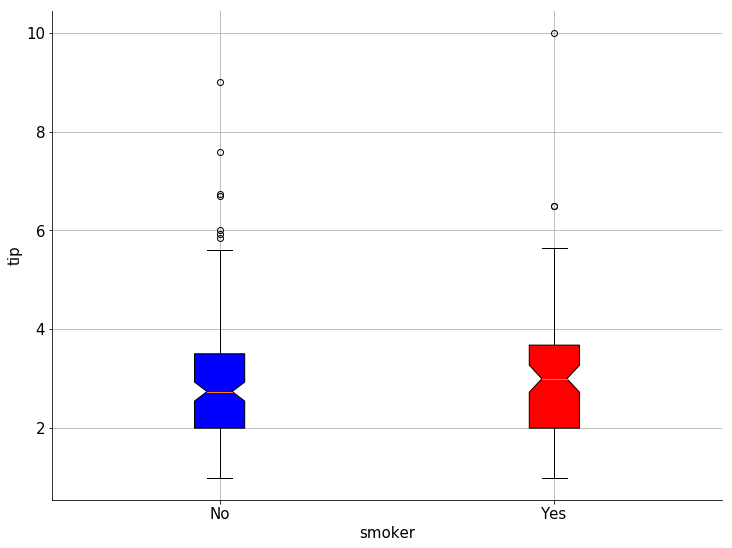

In [86]:
def multi_box(data, distr_col, clsf_col):
    _,axe=plt.subplots()
    clsf = data[clsf_col].value_counts().index
    n = len(clsf)
    alldata=[data[data[clsf_col]==c][distr_col] for c in clsf]
    bplot=axe.boxplot(alldata, patch_artist=True,notch=True)
    plt.setp(axe,xticks=[x+1 for x in range(n)],xticklabels=clsf)
    colors = ['b','red','green','magenta','cyan','yellow','black','white']
    for patch,color in zip(bplot['boxes'],colors[:n]):
        patch.set_facecolor(color)
    axe.set_xlabel(clsf_col)
    axe.set_ylabel(distr_col)
    axe.grid()
multi_box(data,'tip','smoker')

* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

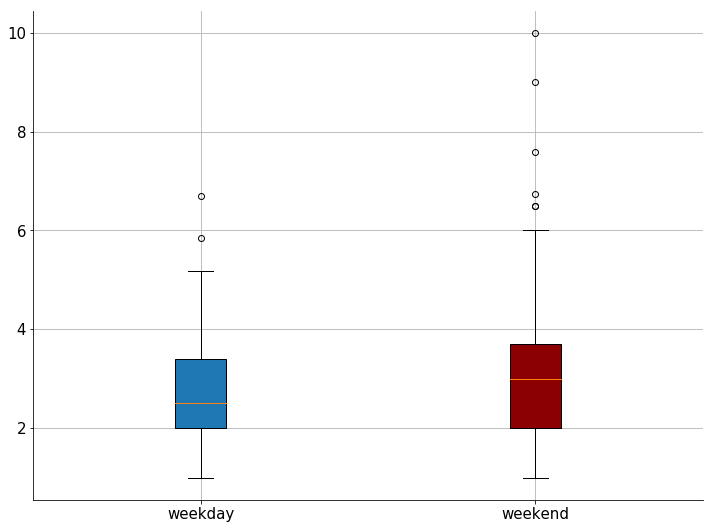

In [87]:
weekend=data.query("day=='Sat' or day=='Sun'")['tip']
weekday=data.query("not(day=='Sat' or day=='Sun')")['tip']
_,axe=plt.subplots()
bplot = axe.boxplot([weekday,weekend],patch_artist=True)
bplot['boxes'][1].set_facecolor('darkred')
plt.xticks([1,2],['weekday','weekend'])
plt.grid()

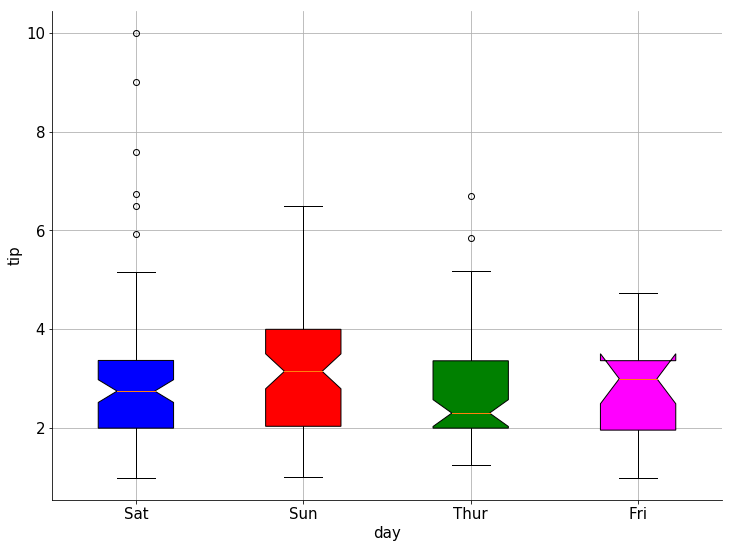

In [88]:

multi_box(data,'tip','day')
#multi_vio(data,'tip','day')

* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

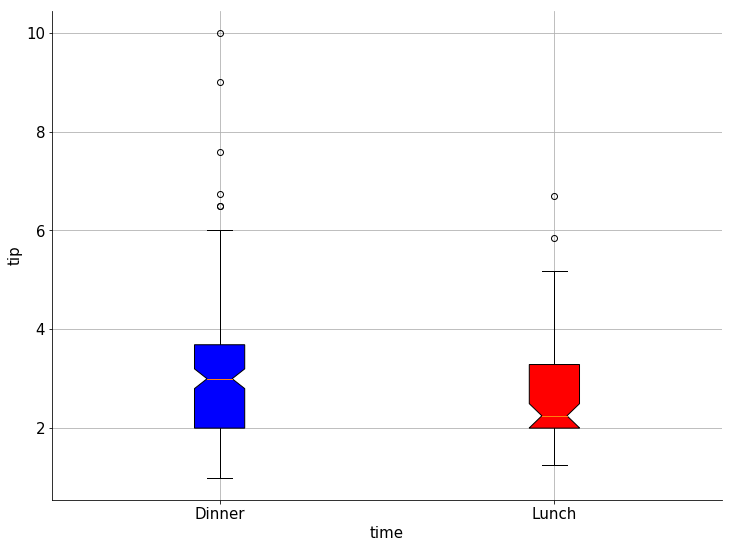

In [89]:
multi_box(data,'tip','time')

* 就餐人数是否会对慷慨度产生影响（分类箱式图）

Text(0.5,1,'The distribution of tipping by size')

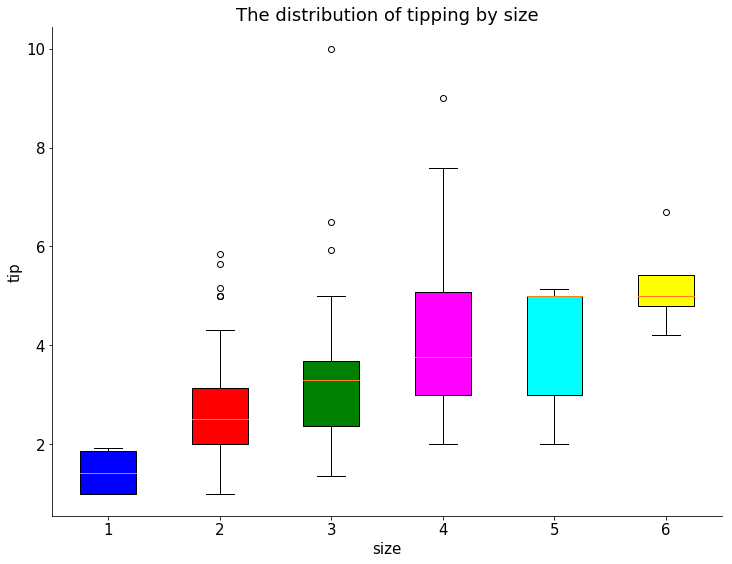

In [91]:
data_g1 = data.groupby('size')
b_data = [g[1]['tip'] for g in data_g1]
x_data = [g[0] for g in data_g1]
_,axe = plt.subplots()
bplot = axe.boxplot(b_data,patch_artist=True)
colors = ['b','red','green','magenta','cyan','yellow','black','white']
for c,p in zip(colors, bplot['boxes']):
    p.set_facecolor(c)
plt.xlabel('size')
plt.ylabel('tip')
plt.title(u'The distribution of tipping by size')

* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

Text(0.5,1,'The influence of gender and smoking on generosity')

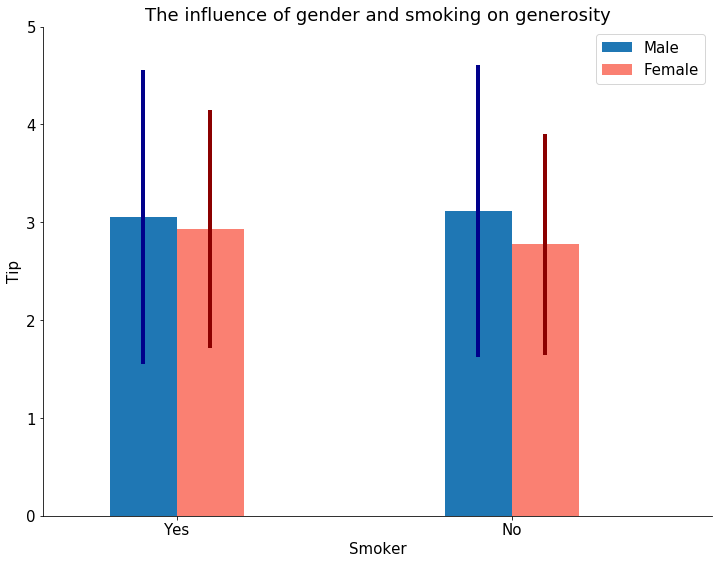

In [92]:
tmp_data=data.groupby(['sex','smoker'])['tip'].agg([np.mean,np.std])
width = 0.2
_,axe=plt.subplots()
plt.bar([1,2],tmp_data['mean'].loc['Male'],width=width, label='Male')
plt.errorbar([1,2],tmp_data['mean'].loc['Male'], 
             yerr = tmp_data['std'].loc['Male'], ls ='none',lw=4,color='darkblue',label=None)
plt.bar([x+width for x in [1,2]],tmp_data['mean'].loc['Female'],width=width,label='Female',color='salmon')
plt.errorbar([x+width for x in [1,2]],tmp_data['mean'].loc['Female'],
             yerr=tmp_data['std'].loc['Female'],ls='none',lw=4,color='darkred',label=None)
plt.setp(axe, xticks=[1.1,2.1], xticklabels=['Yes','No'])
plt.legend(fontsize=15)
plt.xlabel('Smoker',fontsize=15)
plt.ylabel('Tip',fontsize=15)
plt.axis([0.7,2.7,0,5])
plt.title(u'The influence of gender and smoking on generosity')